<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"datos\autorenew.csv")

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Lo primero, veamos si hay filas completamente duplicadas:

In [4]:
df.duplicated().sum()

4

Las descartamos, ya que no nos aportan información.

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

Comprobemos que los tipos de los datos son correctos.

In [6]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerCV                float64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures             int64
postalCode               int64
lastSeen                object
dtype: object

Hay varios que hay que cambiar: 

- Las columnas `dateCrawled`, `dateCreated` y `lastSeen` a datetime.

- La columna ``monthOfRegistration``, `yearOfRegistration` y `postalCode`, aunque sean números, representan categorías.

In [7]:
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"])
df["dateCreated"] = pd.to_datetime(df["dateCreated"])
df["lastSeen"] = pd.to_datetime(df["lastSeen"])

In [8]:
df[["monthOfRegistration", "yearOfRegistration", "postalCode"]] = df[["monthOfRegistration", "yearOfRegistration", "postalCode"]].astype('O')

In [9]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration             object
gearbox                        object
powerCV                       float64
model                          object
kilometer                       int64
monthOfRegistration            object
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                     object
lastSeen               datetime64[ns]
dtype: object

Hagamos una primera comprobación de nulos con `isna`:

In [10]:
df.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
nrOfPictures                0
postalCode                  0
lastSeen                    0
dtype: int64

A primera vista los nulos se encuentran solo en las columnas `vehicleType`, ``gearbox``, ``model``, ``fuelType`` y ``notRepairedDamage``. Sin embargo, puede ser que ésto sea porque en el resto de columnas los nulos estén descritos de otra manera (ya sea un número en concreto, como el 0, una string u otros métodos).

Empecemos separando las numéricas de las categóricas (por ahora ignoraremos las de formato fecha):

In [11]:
def separate_types(dataframe):
    dataframe_numeric = dataframe.select_dtypes(include = np.number)
    dataframe_categorical = dataframe.select_dtypes("object")
    return dataframe_numeric, dataframe_categorical

In [12]:
numeric, categorical = separate_types(df)

Y hagamos un describe para los dos tipos de variables:

In [13]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371524.0,17295.302511,3.587973e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
powerCV,371524.0,113.967402,1.895175e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371524.0,125618.842928,4.011214e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
nrOfPictures,371524.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


Aquí de primeras ya vemos que la columna de ``nrOfPictures`` no nos aportan información ninguna, por lo que sería razonable suprimirla. Por otro lado ya se detecta que hay muchos outliers en el resto de las columnas numéricas, presentando máximos muy elevados (comparado con Q3).

In [14]:
df.drop(columns="nrOfPictures", inplace=True)

In [15]:
categorical.describe().T

,count,unique,top,freq
name,371524,233531,Ford_Fiesta,657
seller,371524,2,private,371521
offerType,371524,2,offer,371512
abtest,371524,2,test,192583
vehicleType,237761,7,small car,80022
yearOfRegistration,371524,155,2000,24551
gearbox,351315,2,manually,274212
model,351040,251,golf,30070
monthOfRegistration,371524,13,0,37675
fuelType,338138,7,petrol,223854


En las categóricas no vemos nada destacable a primera vista, aunque será necesario realizar un análisis más exhaustivo.

Empecemos el EDA con las numéricas.

## Numéricas

### Price

Veamos los menores y mayores valores de precios, para ver si éstos tienen sentido.

In [16]:
df["price"].sort_values().unique()[:200]

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  24,  25,  26,  27,  29,
        30,  32,  33,  35,  38,  39,  40,  45,  47,  49,  50,  55,  58,
        59,  60,  65,  66,  69,  70,  74,  75,  77,  79,  80,  85,  88,
        89,  90,  95,  98,  99, 100, 101, 105, 106, 108, 110, 111, 112,
       115, 117, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130,
       132, 133, 135, 139, 140, 142, 145, 149, 150, 155, 156, 157, 158,
       159, 160, 162, 165, 166, 169, 170, 173, 175, 177, 179, 180, 181,
       185, 188, 189, 190, 192, 193, 195, 196, 198, 199, 200, 202, 205,
       209, 210, 211, 215, 217, 219, 220, 222, 224, 225, 229, 230, 233,
       235, 236, 238, 240, 243, 245, 248, 249, 250, 251, 252, 253, 255,
       259, 260, 261, 263, 265, 266, 269, 270, 272, 273, 274, 275, 277,
       278, 279, 280, 281, 284, 285, 288, 289, 290, 293, 295, 298, 299,
       300, 301, 305, 308, 309, 310, 315, 316, 319, 320, 321, 32

Un coche puede ser barato, pero valer 0€? Aquí hay claramente algo raro. Estos pueden ser valores erróneos en nuestros datos, por lo que sería conveniente sustituir aquellos sin sentido con nulos, y posteriormente predecir sus precios con el resto de los datos disponibles. Vamos a poner un umbral de hasta 250 €. Debajo de este precio los consideraremos erróneos y sustituiremos por nulos. Cabe recalcar que este umbral es totalmente arbitrario, pero es un criterio necesario para reducir el ruido, además de que no representan un porcentaje muy alto de los datos (6%).

In [17]:
sum(df["price"]<=250)/df.shape[0]

0.059729654073491886

In [18]:
df.loc[df[df["price"]<=250].index, "price"] = np.nan

Ahora con los valores superiores:

In [19]:
df["price"].sort_values().unique()[-100:]

array([1.90000000e+05, 1.92500000e+05, 1.94000000e+05, 1.95000000e+05,
       1.95900000e+05, 1.97000000e+05, 1.97500000e+05, 1.98000000e+05,
       1.99900000e+05, 2.00000000e+05, 2.05000000e+05, 2.08250000e+05,
       2.14800000e+05, 2.19000000e+05, 2.20000000e+05, 2.24000000e+05,
       2.25000000e+05, 2.29000000e+05, 2.29900000e+05, 2.30000000e+05,
       2.33000000e+05, 2.35000000e+05, 2.37500000e+05, 2.38000000e+05,
       2.39000000e+05, 2.45000000e+05, 2.49000000e+05, 2.50000000e+05,
       2.54900000e+05, 2.57500000e+05, 2.58000000e+05, 2.59000000e+05,
       2.60000000e+05, 2.65000000e+05, 2.70000000e+05, 2.75000000e+05,
       2.79000000e+05, 2.84000000e+05, 2.85000000e+05, 2.94900000e+05,
       2.95000000e+05, 2.99000000e+05, 3.00000000e+05, 3.23223000e+05,
       3.45000000e+05, 3.49000000e+05, 3.50000000e+05, 3.68000000e+05,
       3.70000000e+05, 3.90000000e+05, 3.95000000e+05, 3.99997000e+05,
       4.20000000e+05, 4.40000000e+05, 4.45000000e+05, 4.66000000e+05,
      

Para filtrar los valores altos, pondré una condición extra: que la potencia sea menos de 450 CV. Esto, sumado a una condición de que precios por encima de 150000 reducirá la cantidad de datos perdidos. Esto se basa en una búsqueda en internet, donde los coches de lujo rondan los 450 CV - 750 CV, con precios desde los 150000 € hasta los 600000 €. Al igual que antes, es inevitable perder datos.

In [20]:
upper_error_index = df[(df["price"] > 1.5e+05) & (df["powerCV"] < 450)].index

In [21]:
df.loc[upper_error_index, "price"] = np.nan

In [22]:
df["price"].isna().sum()

22346

Queda aún un valor extraño:

In [23]:
df.sort_values('price',ascending = False).head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
129969,2016-03-11 08:37:57,Kaufe_AUTOS_Zum_basteln,private,offer,2.147484e+09,test,other,1996,manually,876.0,NaN,150000,1,other,sonstige_autos,yes,2016-03-11,4720,2016-03-20 11:45:35
366857,2016-03-21 10:53:06,Ferrari_FXX__unfallfrei__perfekter_Zustand,private,offer,3.895000e+06,test,coupe,2006,NaN,788.0,NaN,5000,4,petrol,sonstige_autos,no,2016-03-21,60323,2016-03-22 10:36:39
364167,2016-04-04 21:25:21,Ferrari_FXX,private,offer,3.890000e+06,test,coupe,2006,NaN,788.0,NaN,5000,7,NaN,sonstige_autos,no,2016-04-04,60313,2016-04-05 12:07:37
41980,2016-03-11 09:37:17,Maserati_MC12,private,offer,2.995000e+06,control,coupe,2005,NaN,621.0,NaN,5000,7,petrol,sonstige_autos,no,2016-03-11,74232,2016-04-06 21:47:44
45055,2016-04-02 00:06:21,Ferrari_LaFerrari_Deutsche_Auslieferung._A_Cel...,private,offer,2.795000e+06,control,coupe,2016,NaN,950.0,NaN,5000,3,NaN,sonstige_autos,no,2016-04-01,60435,2016-04-03 14:32:00


Ese primer vehículo no tiene sentido ni el precio ni los CV. Procedemos a rellenarlo con nulo.

In [24]:
df.loc[df[df["price"] > 1e+9].index, 'price'] = np.nan

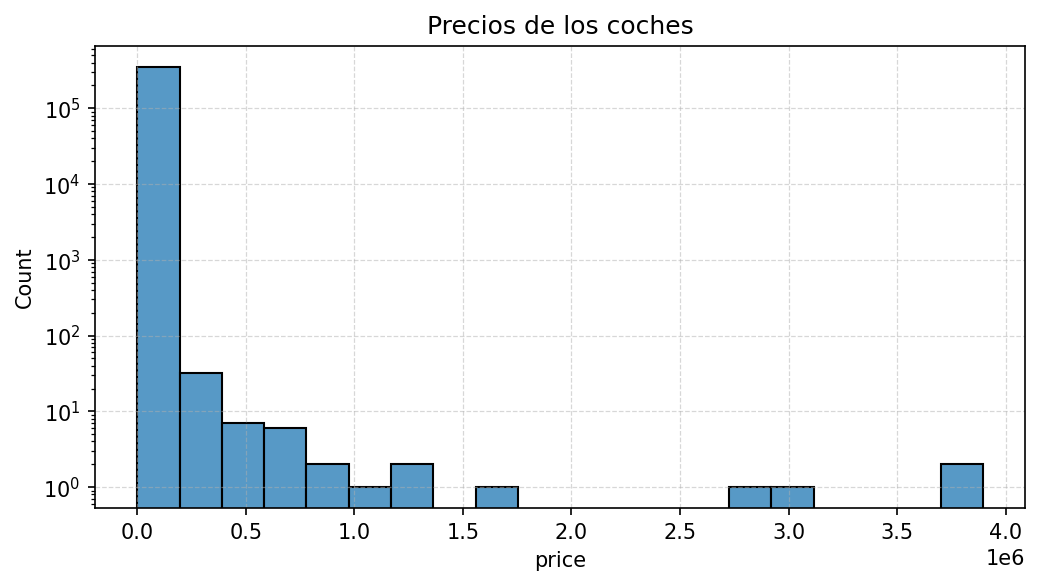

In [25]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Precios de los coches")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.histplot(df["price"], bins = 20)
plt.yscale('log')

plt.show()

Vemos que la tendencia está entre los 250 - 50000 €, con muchos menos valores más allá de este intervalo.

## PowerCV

La potencia de un coche, vamos a considerar datos erróneos aquellos que no estén en el rango de 50 CV - 1000 CV. Este rango se estima a partir de un valor razonable en un coche funcional.

In [26]:
cv_cond = (df["powerCV"] < 50) | (df["powerCV"] > 1000)
df.loc[df[cv_cond].index, "powerCV"] = np.nan

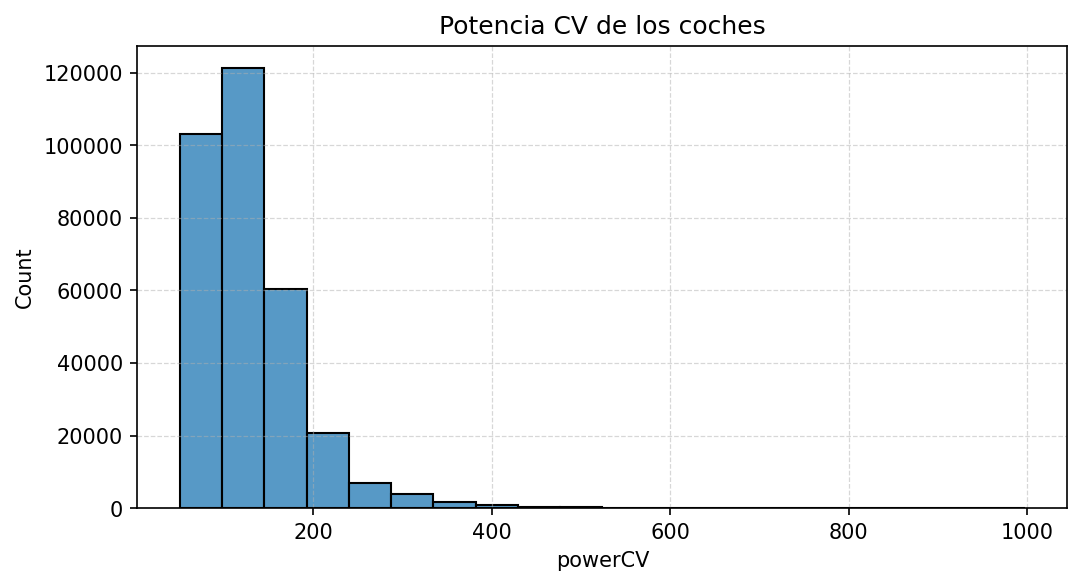

In [27]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Potencia CV de los coches")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.histplot(df["powerCV"], bins = 20)
plt.show()

Para la potencia de los coches, la gráfica indica que los coches rondan los 60 - 200 CV, disminuyendo en frecuencia más allá de este intervalo.

## Kilometer

En cuanto al kilometraje de los coches, podemos ver que en realidad se trata de una variable discreta:

In [28]:
df["kilometer"].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000], dtype=int64)

Solo hay unos cuantos valores posibles, lo que significa que los kilómetros de los coches han sido agrupados en grupos discretos.

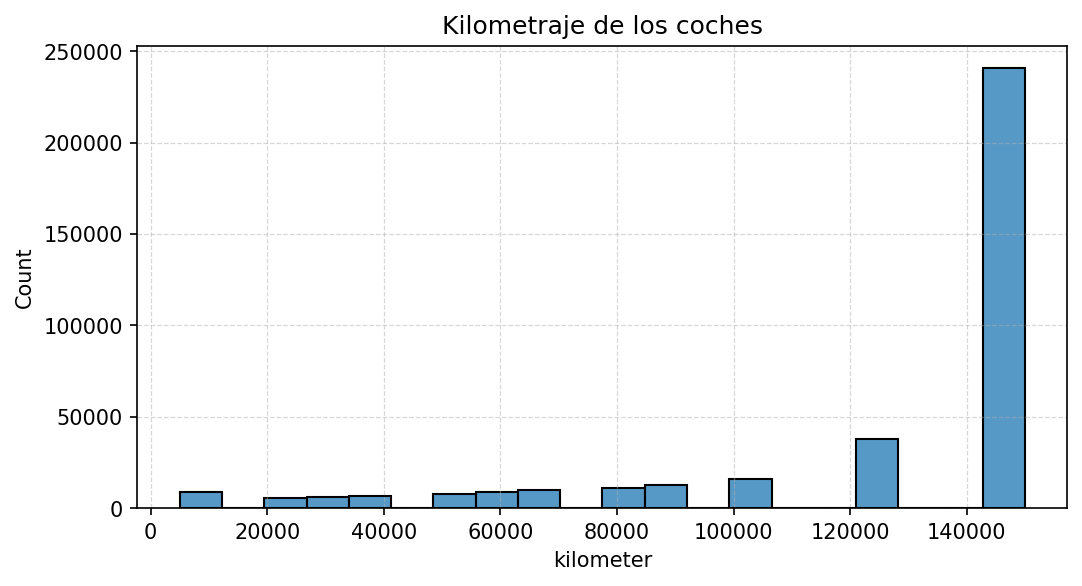

In [29]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Kilometraje de los coches")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.histplot(df["kilometer"], bins = 20)
plt.show()

Vemos valores separados (una posible visualización que indica que son discretos), con la mayoría de ellos en 150000 km. Cuanto menos kms, menos frecuente (a excepción de los de 5000 km).

## Categóricas

Recordemos las columnas categóricas que contenían nulos:

In [30]:
df.select_dtypes('O').isna().sum()

name                        0
seller                      0
offerType                   0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
model                   20484
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
postalCode                  0
dtype: int64

En general, para las categóricas se rellenarán los nulos con una categoría nueva (algo como Desconocido). Categóricas como el nombre, el código postal no tienen nulos y no requieren tratamiento.

### Seller

In [31]:
df["seller"].value_counts()

seller
private       371521
commercial         3
Name: count, dtype: int64

### Offertype

In [32]:
df["offerType"].value_counts()

offerType
offer      371512
request        12
Name: count, dtype: int64

### AB test

In [33]:
df["abtest"].value_counts()

abtest
test       192583
control    178941
Name: count, dtype: int64

### Vehicle Type

Para el tipo de vehículo tenemos nulos, además de una categoría de *otros*. Hemos de tener en cuenta de que cada una de estas son categorías diferentes, ya que una indica que es otro tipo, mientras que los nulos serán una categoría desconocida.

In [34]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

In [35]:
df.loc[df[df["vehicleType"].isna()].index, "vehicleType"] = 'unknown'

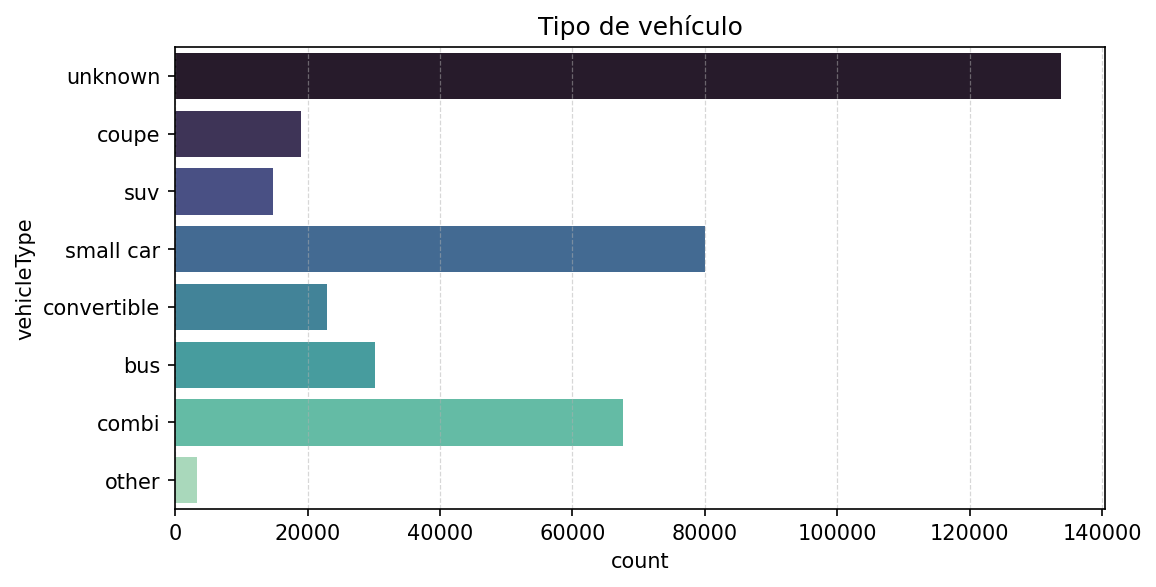

In [36]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Tipo de vehículo")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.countplot(df["vehicleType"], palette='mako')
plt.show()

Vemos que tenemos muchos registros que desconocenmos el tipo de vehículo, seguido de coches pequeños y combis.

### Año de registro

Técnicamente los años son categóricos, pero representan números. 

In [37]:
df["yearOfRegistration"].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

En el año de registro vemos muchos años que no tienen sentido. Éstos se pueden sustituir por una nueva categórica de desconocido.

In [38]:
cond_year = (df["yearOfRegistration"] < 1900) | (df["yearOfRegistration"] >= 2025)
df.loc[df[cond_year].index, "yearOfRegistration"] = 'unknown'

Para hacer el plot quitaremos los desconocidos, para simplemente poder ver una distribución más clara (de forma numérica).

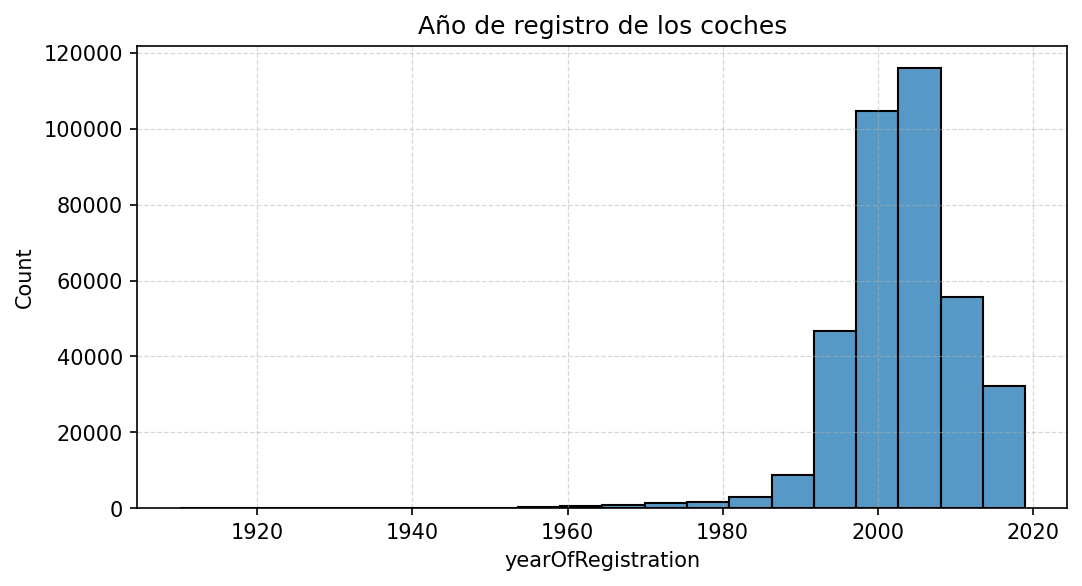

In [39]:
df_cleaned = df[df["yearOfRegistration"] != "unknown"]


df_cleaned["yearOfRegistration"] = df_cleaned["yearOfRegistration"].astype(int)

plt.figure(figsize = (8,4), dpi = 150)

plt.title("Tipo de vehículo")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.histplot(data=df_cleaned, x="yearOfRegistration", bins=20)
plt.title("Año de registro de los coches")
plt.show()

Vemos que los coches disponibles han sido registrados en torno a los 2000s-2010s, viendo cierta tendencia en el mercado de segunda mano.

### Gearbox

In [40]:
df["gearbox"].value_counts()

gearbox
manually     274212
automatic     77103
Name: count, dtype: int64

In [41]:
df.loc[df[df["gearbox"].isna()].index] = 'unknown'

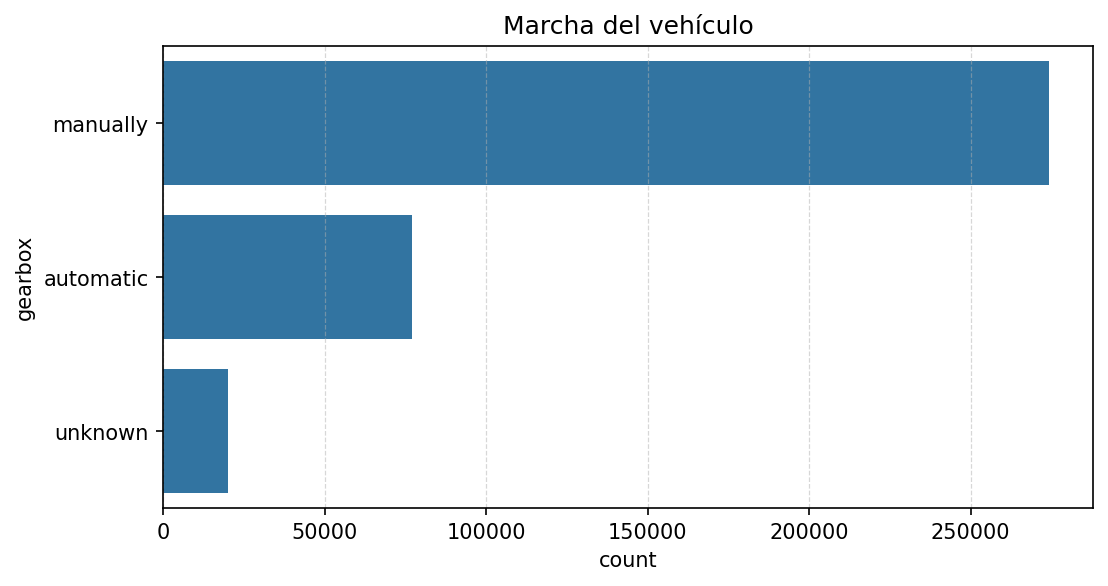

In [42]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Marcha del vehículo")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.countplot(df["gearbox"])
plt.show()

El mercado tiene sobretodo coches de cambio manual.

### Model

En el modelo simplemente imputamos con la categoría de desconocido.

In [43]:
df.loc[df[df["model"].isna()].index, "model"] = 'unknown'

### Mes de registro

En los meses encontramos un mes 0, el cual no tiene sentido. Este será el que representará nuestros valores desconocidos. Podemos sustituir por una categoría de desconocido también.

In [44]:
df.loc[df[df["monthOfRegistration"] == 0].index, 'monthOfRegistration'] = 'unknown'

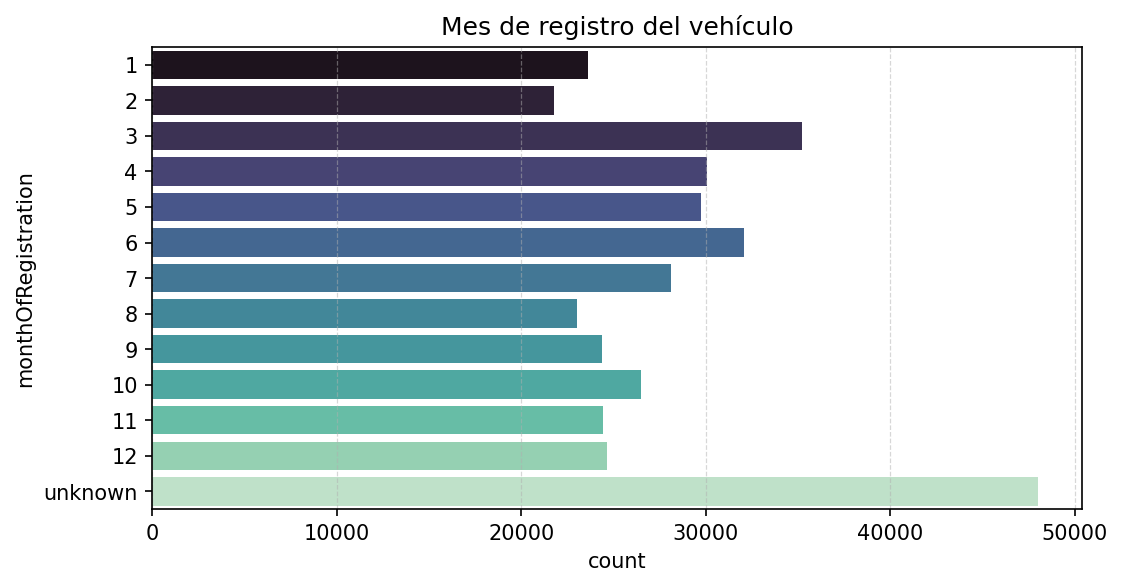

In [45]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Mes de registro del vehículo")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.countplot(df, y = 'monthOfRegistration',
               order = df.groupby("monthOfRegistration")["name"].count().index, palette='mako')
plt.show()

Observamos que (además de los desconocidos), los meses más frecuentes de registros son marzo y junio.

### Tipo de combustible

En tipo de combustible seguiremos con el mismo proceso.

In [46]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'unknown', 'lpg', 'other', 'hybrid',
       'cng', 'electro'], dtype=object)

In [47]:
df.loc[df[df["fuelType"].isna()].index, "fuelType"] = 'unknown'

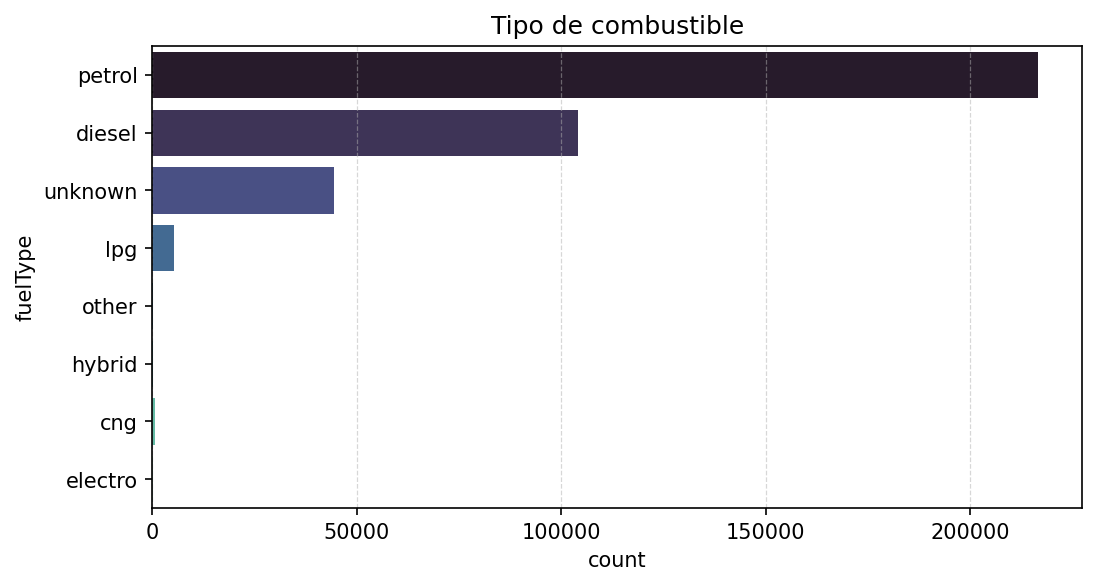

In [48]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Tipo de combustible")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.countplot(data = df, y = 'fuelType', palette='mako')
plt.show()

El combustible más común es la gasolina, seguido del diésel. Los desconocidos también representan una proporción bastante significativa.

### Marca

No hay nulos en marca.

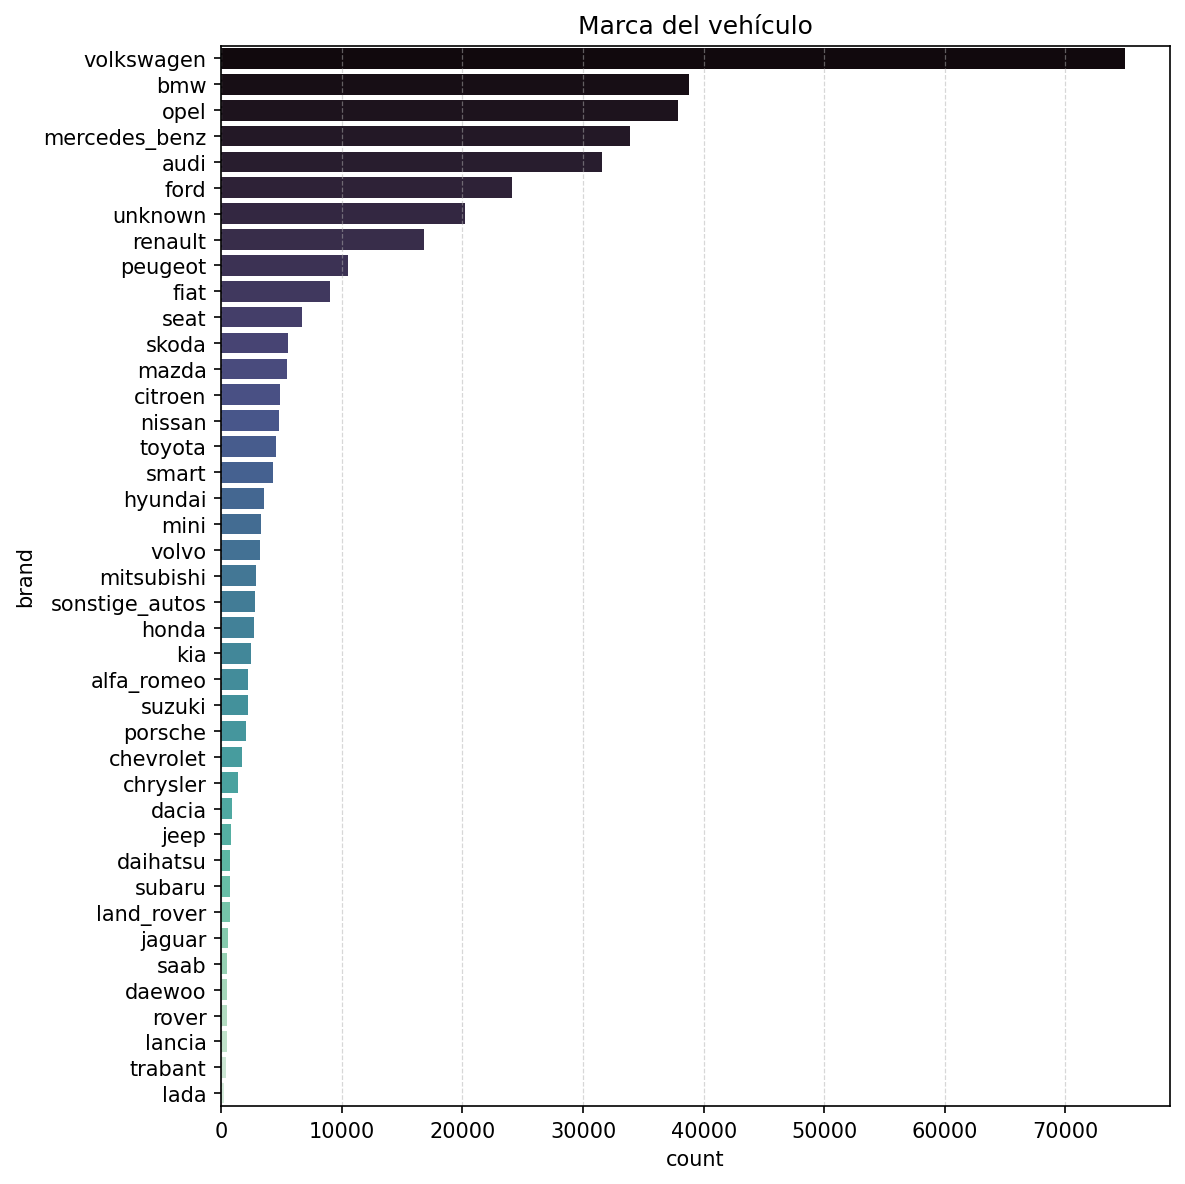

In [49]:
plt.figure(figsize = (8,8), dpi = 150)

plt.title("Marca del vehículo")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.countplot(df, y = "brand",
               order = df.groupby("brand")["name"].count().sort_values(ascending=False).index, palette = 'mako')
plt.tight_layout()

Las marcas con más coches a la venta son Volkswagen, bmw y opel. Es curioso observar el countplot, ya que uno se esperaría más oferta de marcas más baratas, pero el top no lo ocupan éstas.

### Daños sin reparar

Con los daños se puede crear de nuevo la categoría de desconocido.

In [50]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no', 'unknown'], dtype=object)

In [51]:
df.loc[df[df["notRepairedDamage"].isna()].index, "notRepairedDamage"] = 'unknown'

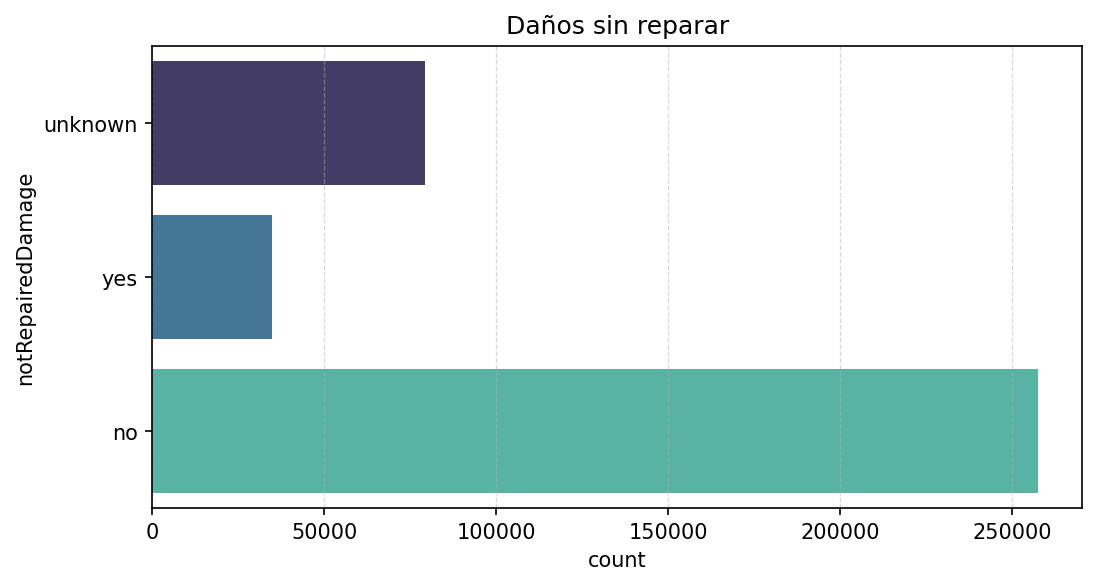

In [52]:
plt.figure(figsize = (8,4), dpi = 150)

plt.title("Daños sin reparar")
plt.grid(ls = "--", lw = 0.6, alpha = 0.5)
sns.countplot(df, y = "notRepairedDamage", palette = 'mako')
plt.show()

La mayoría de coches del mercado no tiene daños no reparados.

## Gestión de nulos

In [53]:
imputer_knn = KNNImputer(n_neighbors=2)
df_numeric = df.select_dtypes('number')
df_imput = pd.DataFrame(imputer_knn.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)

ValueError: at least one array or dtype is required

In [ ]:
df_imput.to_csv("datos/numeric_knn.csv")

In [ ]:
df_knn = df.copy()
df_knn[df.select_dtypes('number').columns] = df_imput

In [ ]:
imputer_it = IterativeImputer()
df_it = pd.DataFrame(imputer_it.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)

In [ ]:
imputer_forest = IterativeImputer(estimator=RandomForestRegressor())
df_forest = pd.DataFrame(imputer_forest.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
df_imput.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371524.0,5890.203753,15103.141134,251.0,1220.0,3000.0,7400.0,3895000.0
powerCV,371524.0,129.678403,61.142782,50.0,87.0,115.0,168.0,998.0
kilometer,371524.0,125618.842928,40112.138811,5000.0,125000.0,150000.0,150000.0,150000.0


In [ ]:
df_it.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371524.0,6057.019891,15134.082729,-3267.478908,1390.0,3399.000000,7550.0,3.895000e+06
powerCV,371524.0,126.490432,57.303357,50.000000,89.0,120.011681,148.0,1.543886e+03
kilometer,371524.0,125618.842928,40112.138811,5000.000000,125000.0,150000.000000,150000.0,1.500000e+05
